# hepatitis BN stacking

Training on hepatitis dataset using bayesian_network model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hepatitis data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()
gen_method = "bayesian_network"
target = "Baselinehistological staging"


In [3]:
# Split hepatitis data into 80/20 train and test
data_train, data_test = train_test_split(data_real, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv("Data\HCV_train.csv", index=False)
data_test.to_csv("Data\HCV_test.csv", index=False)


In [3]:
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# syn_v1

In [5]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v1.csv", key="synth")

[2024-05-14T19:14:32.687739+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       35       2   35      2               2          2          2   
1       57       2   24      2               2          1          1   
2       55       1   30      2               2          1          2   
3       61       2   23      2               2          1          2   
4       57       1   29      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
1103    61       2   22      2               1          1          1   
1104    42       2   32      2               1          1          2   
1105    42       1   28      2               2          2          1   
1106    52       2   28      2               2          2          1   
1107    51       1   35      2               1          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    1          

# syn_v2

In [6]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v1.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v1_test.csv", index=False)

In [7]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v2.csv", key="synth")

[2024-05-14T19:14:41.998181+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
315     37       1   35      2               1          1          1   
1869    34       2   34      1               1          2          1   
1576    41       2   30      1               1          2          1   
1336    35       2   35      2               1          1          1   
655     37       2   31      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
1638    43       2   25      2               2          1          2   
1095    61       2   22      2               1          1          1   
1130    42       2   32      2               1          1          2   
1294    42       1   28      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
315                                  2          

# syn_v3

In [8]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v2.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v2_test.csv", index=False)

In [9]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v3.csv", key="synth")

[2024-05-14T19:14:52.250016+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
4194    36       1   29      2               1          1          1   
2389    54       1   30      2               2          2          2   
2561    52       1   24      1               2          1          2   
5344    54       2   23      2               1          2          1   
3690    32       2   27      1               2          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
3772    54       2   34      2               1          2          2   
5191    53       2   27      1               2          2          2   
5226    42       1   22      2               2          2          1   
5390    46       2   35      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
4194                                 2          

# syn_v4

In [10]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v3.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v4.csv", key="synth")

[2024-05-14T19:15:20.791569+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
9729    39       2   32      2               2          2          1   
4720    34       2   24      2               1          2          2   
474     41       1   31      2               1          1          2   
4874    56       2   25      1               2          1          2   
2391    38       2   31      1               2          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
5734    60       1   22      1               1          2          2   
5191    53       2   27      1               2          2          2   
5390    46       2   35      2               2          2          1   
860     52       2   28      2               2          2          1   
7270    59       1   34      2               1          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
9729                                 1          

# syn_v5

In [12]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v4.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v5.csv", key="synth")

[2024-05-14T19:17:04.465299+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
8704     36       2   29      2               1          2          2   
558      34       1   25      1               2          1          1   
6959     36       2   31      1               2          1          2   
20195    54       2   26      2               1          2          1   
20145    55       1   26      2               1          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
11964    35       1   33      2               1          1          1   
21575    57       1   26      1               2          2          1   
5390     46       2   35      2               2          2          1   
860      52       2   28      2               2          2          1   
15795    43       1   22      2               1          1          1   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
8704                               

# stack_synth_only

In [14]:
# Remove the first 1385 rows, equal to the number of real data, from stack_v4
data_stack_synth_only = data_stack.iloc[1385:, :]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\HCV_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_synth_only_test.csv", index=False)

# syn_synth_only

In [15]:
# Synthesize data
gen_count = data_stack_synth_only.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_synth_only_syn_.csv", key="synth")

[2024-05-14T19:26:25.233039+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
7889     35       2   22      2               2          2          2   
11634    55       1   23      1               2          2          2   
20750    42       1   29      2               2          1          1   
3329     34       2   22      2               2          1          1   
18793    59       1   25      2               2          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
12669    52       2   22      1               2          1          1   
13349    32       1   24      2               2          1          2   
6775     59       1   25      1               2          1          1   
2245     32       2   22      2               1          1          1   
17180    39       1   34      2               2          1          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
7889                               

# Eval on syn_v1

In [4]:
# Read train and test from real data
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# Count of real_data
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.010441,0.002603,0.989559,0.002603
1,pca_eigval_diff,u,0.012311,NaN,0.987689,NaN
2,pca_eigvec_ang,u,0.271218,NaN,0.913669,NaN
3,avg_cio,u,0.466702,0.069793,0.466702,0.069793
4,corr_mat_diff,u,0.701424,NaN,0.998272,NaN
5,mutual_inf_diff,u,1.485455,NaN,0.996341,NaN
6,ks_tvd_stat,u,0.036806,0.007027,0.963194,0.007027
7,frac_ks_sigs,u,0.137931,NaN,0.862069,NaN
8,avg_h_dist,u,0.002940,0.000925,0.997060,0.000925
9,avg_pMSE,u,0.003492,0.000249,0.986031,0.000997


# Eval on syn_v2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.014703,0.002605,0.985297,0.002605
1,pca_eigval_diff,u,0.015355,NaN,0.984645,NaN
2,pca_eigvec_ang,u,0.323368,NaN,0.897069,NaN
3,avg_cio,u,0.406583,0.083105,0.406583,0.083105
4,corr_mat_diff,u,0.770458,NaN,0.998102,NaN
5,mutual_inf_diff,u,1.489203,NaN,0.996332,NaN
6,ks_tvd_stat,u,0.040960,0.007446,0.959040,0.007446
7,frac_ks_sigs,u,0.206897,NaN,0.793103,NaN
8,avg_h_dist,u,0.003174,0.001272,0.996826,0.001272
9,avg_pMSE,u,0.007060,0.000415,0.971758,0.001660


# Eval on syn_v3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016787,0.002605,0.983213,0.002605
1,pca_eigval_diff,u,0.019984,NaN,0.980016,NaN
2,pca_eigvec_ang,u,0.420017,NaN,0.866304,NaN
3,avg_cio,u,0.413269,0.092249,0.413269,0.092249
4,corr_mat_diff,u,0.856638,NaN,0.997890,NaN
5,mutual_inf_diff,u,1.539551,NaN,0.996208,NaN
6,ks_tvd_stat,u,0.045894,0.009079,0.954106,0.009079
7,frac_ks_sigs,u,0.206897,NaN,0.793103,NaN
8,avg_h_dist,u,0.003264,0.001228,0.996736,0.001228
9,avg_pMSE,u,0.009465,0.000355,0.962141,0.001420


# Eval on syn_v4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023423,0.002606,0.976577,0.002606
1,pca_eigval_diff,u,0.017926,NaN,0.982074,NaN
2,pca_eigvec_ang,u,0.522877,NaN,0.833563,NaN
3,avg_cio,u,0.279235,0.073847,0.279235,0.073847
4,corr_mat_diff,u,0.885608,NaN,0.997819,NaN
5,mutual_inf_diff,u,1.588187,NaN,0.996088,NaN
6,ks_tvd_stat,u,0.049620,0.010361,0.950380,0.010361
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.002700,0.000974,0.997300,0.000974
9,avg_pMSE,u,0.017955,0.000644,0.928180,0.002576


# Eval on syn_v5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.031506,0.002601,0.968494,0.002601
1,pca_eigval_diff,u,0.018254,NaN,0.981746,NaN
2,pca_eigvec_ang,u,0.540680,NaN,0.827896,NaN
3,avg_cio,u,0.209941,0.060440,0.209941,0.060440
4,corr_mat_diff,u,0.900635,NaN,0.997782,NaN
5,mutual_inf_diff,u,1.560048,NaN,0.996158,NaN
6,ks_tvd_stat,u,0.054968,0.010188,0.945032,0.010188
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.003711,0.001226,0.996289,0.001226
9,avg_pMSE,u,0.026148,0.001176,0.895407,0.004705


# Eval on synth_only_stack

In [13]:
# Read synth_only_syn data
syn_sample = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv", index=False)

In [14]:
# Read synth_only_syn_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.030341,0.002603,0.969659,0.002603
1,pca_eigval_diff,u,0.021839,NaN,0.978161,NaN
2,pca_eigvec_ang,u,0.600656,NaN,0.808805,NaN
3,avg_cio,u,0.270832,0.086150,0.270832,0.086150
4,corr_mat_diff,u,0.983488,NaN,0.997578,NaN
5,mutual_inf_diff,u,1.576695,NaN,0.996117,NaN
6,ks_tvd_stat,u,0.054861,0.010719,0.945139,0.010719
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.003499,0.001378,0.996501,0.001378
9,avg_pMSE,u,0.027081,0.000685,0.891675,0.002739


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.460289,0.355384,1.000000
res_stack_v1,0.363718,0.329092,0.997122
res_stack_v2,0.401625,0.330636,0.998561
res_stack_v3,0.451264,0.320129,0.998561
res_stack_v4,0.722924,0.333499,0.994245
res_stack_synth_only,0.584838,0.315822,0.994245


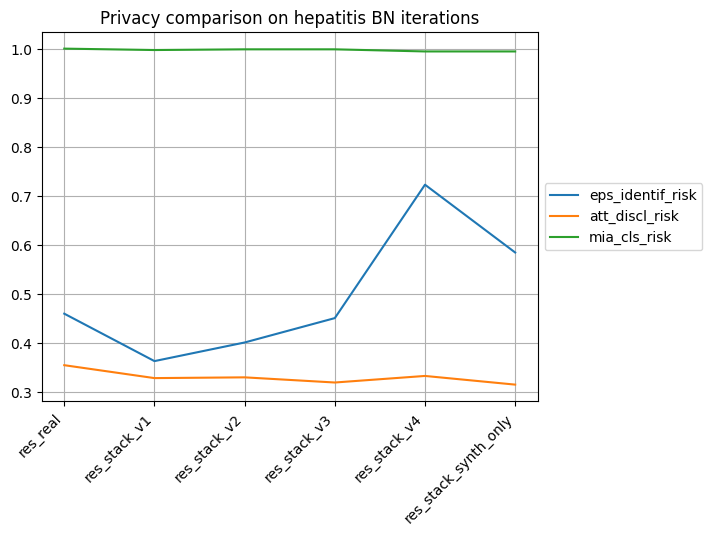

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on hepatitis BN iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,0.141679
res_stack_v1,0.226181
res_stack_v2,0.184272
res_stack_v3,0.193353
res_stack_v4,0.195272
res_stack_synth_only,0.209524


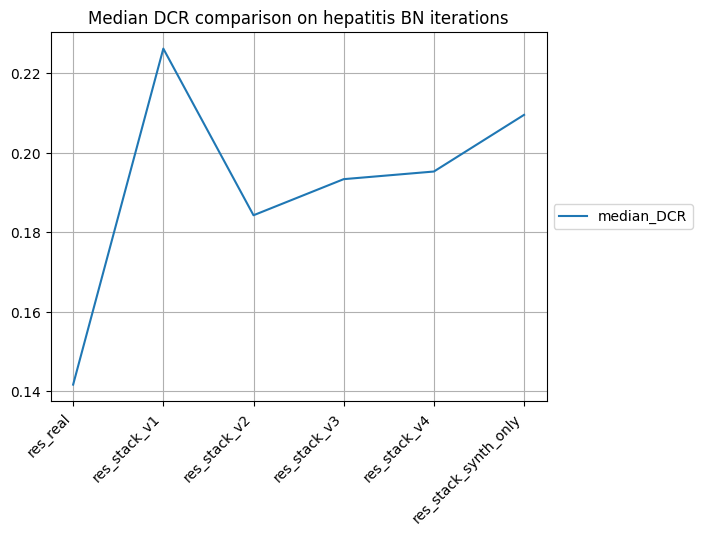

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on hepatitis BN iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.010441,0.003492,0.182334
res_stack_v1,0.014703,0.007060,0.132714
res_stack_v2,0.016787,0.009465,0.146218
res_stack_v3,0.023423,0.017955,0.147363
res_stack_v4,0.031506,0.026148,0.142377
res_stack_synth_only,0.030341,0.027081,0.134470


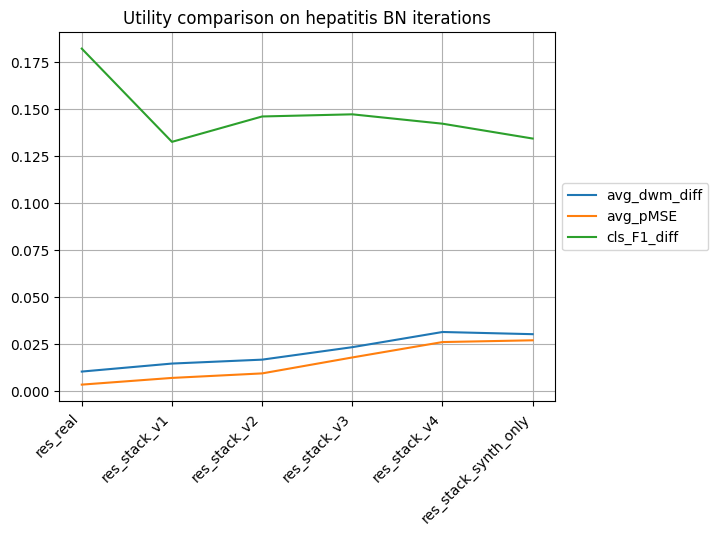

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on hepatitis BN iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.701424
res_stack_v1,0.770458
res_stack_v2,0.856638
res_stack_v3,0.885608
res_stack_v4,0.900635
res_stack_synth_only,0.983488


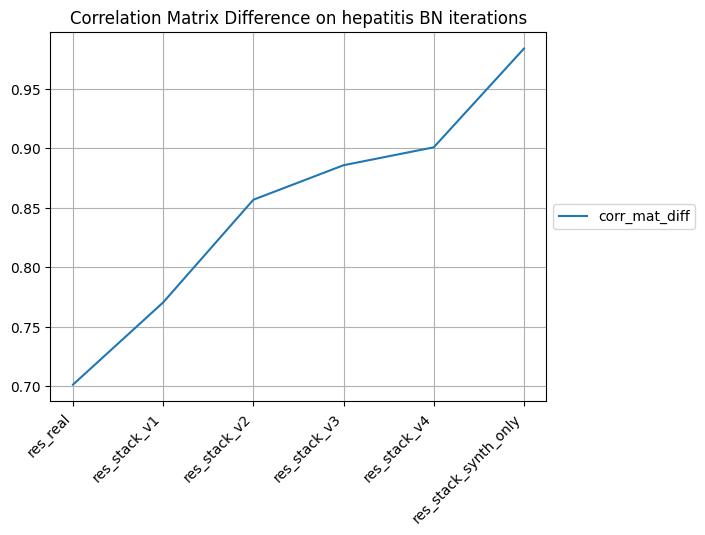

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on hepatitis BN iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.010441,0.012311,0.271218,0.466702,0.701424,1.485455,0.036806,0.137931,0.002940,0.003492,0.485552,0.467035,0.346300,0.228610,0.182334,0.027978,0.070397,0.460289,1.000000,0.355384
res_stack_v1,0.014703,0.015355,0.323368,0.406583,0.770458,1.489203,0.040960,0.206897,0.003174,0.007060,0.575092,0.154629,0.450271,0.056408,0.132714,0.057762,0.000000,0.363718,0.997122,0.329092
res_stack_v2,0.016787,0.019984,0.420017,0.413269,0.856638,1.539551,0.045894,0.206897,0.003264,0.009465,0.595531,0.143903,0.409477,0.132641,0.146218,0.084838,0.019856,0.401625,0.998561,0.330636
res_stack_v3,0.023423,0.017926,0.522877,0.279235,0.885608,1.588187,0.049620,0.241379,0.002700,0.017955,0.606817,0.157241,0.386823,0.158063,0.147363,0.063177,0.014440,0.451264,0.998561,0.320129
res_stack_v4,0.031506,0.018254,0.540680,0.209941,0.900635,1.560048,0.054968,0.241379,0.003711,0.026148,0.645580,0.106614,0.382491,0.212936,0.142377,0.057762,0.025271,0.722924,0.994245,0.333499
res_stack_synth_only,0.030341,0.021839,0.600656,0.270832,0.983488,1.576695,0.054861,0.241379,0.003499,0.027081,0.637817,0.153269,0.383755,0.206980,0.134470,0.047834,0.003610,0.584838,0.994245,0.315822


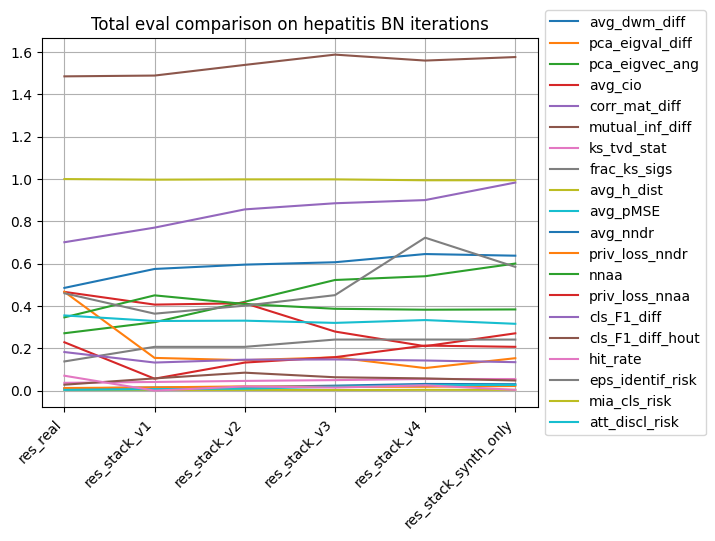

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on hepatitis BN iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.892613,0.505572
1,res_stack_v1,0.872924,0.612065
2,res_stack_v2,0.869419,0.593815
3,res_stack_v3,0.854036,0.587262
4,res_stack_v4,0.845749,0.555365
5,res_stack_synth_only,0.849772,0.573196


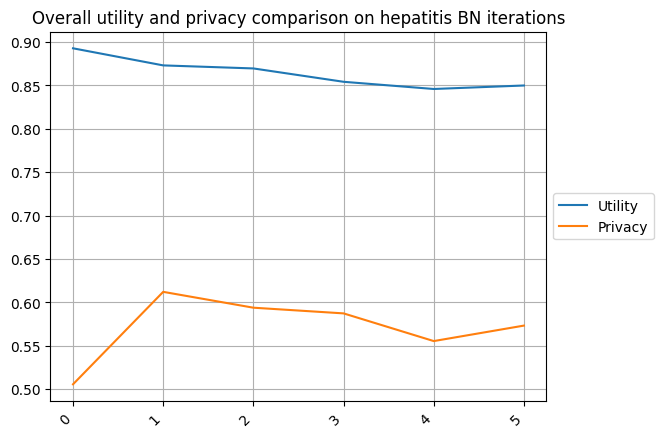

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on hepatitis BN iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()